In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Load the dataset file into a Pandas DataFrame.
data = pd.read_excel('../dataset/sri_lankan_classified_ads_matching_dataset_v1.xlsx')

In [45]:
data.head()

,offering_ad,wanted_ad,category_1,category_2,offering_ad_title,offering_ad_description,wanted_ad_title,wanted_ad_description
0,Ground Floor House for Rent in Colombo 9. Addr...,Looking for a ground floor house for rent in t...,Property,house,Ground Floor House for Rent in Colombo 9. Addr...,Ground Floor House for Rent in Colombo 9. ====...,Looking for a ground floor house for rent in t...,"Budget around 70,000 LKR."
1,නව නිවසක් විකිණීමට මීගොඩ House Sale Meegoda. A...,Looking to buy a house in the Meegoda or Homag...,Property,house,නව නිවසක් විකිණීමට මීගොඩ House Sale Meegoda,"Address: Homagama ,Meegoda ., Bedrooms: 3, Bat...",Looking to buy a house in the Meegoda or Homag...,Around 3 bedrooms would be great. Close to NSB...
2,03 Story House With 08 P Sale At Rawathawatha ...,"Seeking a house around Rawathawatta, Moratuwa....",Property,commercial property,03 Story House With 08 P Sale At Rawathawatha ...,"Property type: Other, Address: Rawathawatha Mo...","Seeking a house around Rawathawatta, Moratuwa",Ideally a two- or three-story house with 4 bed...
3,Mini Apartment Concept - 2 Floors Completed Wi...,Interested in purchasing a property with multi...,Property,commercial property,Mini Apartment Concept - 2 Floors Completed Wi...,"Property type: Building, Address: Templers Roa...",Interested in purchasing a property with multi...,Interested in purchasing a property with multi...
4,"land for sale in homagama. Address: Homagama ,...","Looking for a block of land around Homagama, p...",Property,land,land for sale in homagama,"Address: Homagama , Land type: Residential, La...","Looking for a block of land around Homagama, p...","Looking for a block of land around Homagama, p..."


In [46]:
print(data.shape)

(54489, 8)


## Data preprocessing

In [47]:
# Clean category text and create a combined final label (category_1 + category_2).
data["category_1"] = data["category_1"].astype(str).str.strip()
data["category_2"] = data["category_2"].astype(str).str.strip()

data["final_category"] = data["category_1"] + "_" + data["category_2"]

In [48]:
# Drop columns that are not needed for this model.
data = data.drop(columns=["category_1", "category_2"])

In [49]:
data = data.drop(columns=["wanted_ad","offering_ad_title", "offering_ad_description", "wanted_ad_title", "wanted_ad_description"])

In [50]:
data.head()

,offering_ad,final_category
0,Ground Floor House for Rent in Colombo 9. Addr...,Property_house
1,නව නිවසක් විකිණීමට මීගොඩ House Sale Meegoda. A...,Property_house
2,03 Story House With 08 P Sale At Rawathawatha ...,Property_commercial property
3,Mini Apartment Concept - 2 Floors Completed Wi...,Property_commercial property
4,"land for sale in homagama. Address: Homagama ,...",Property_land


In [51]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (15445, 2)


In [52]:
data.count()    

offering_ad       54489
final_category    54489
dtype: int64

In [53]:
# Remove duplicate rows 
data = data.drop_duplicates()
data.head(5)

,offering_ad,final_category
0,Ground Floor House for Rent in Colombo 9. Addr...,Property_house
1,නව නිවසක් විකිණීමට මීගොඩ House Sale Meegoda. A...,Property_house
2,03 Story House With 08 P Sale At Rawathawatha ...,Property_commercial property
3,Mini Apartment Concept - 2 Floors Completed Wi...,Property_commercial property
4,"land for sale in homagama. Address: Homagama ,...",Property_land


In [54]:
data.count()


offering_ad       39044
final_category    39044
dtype: int64

In [55]:
data.isnull().sum()

offering_ad       0
final_category    0
dtype: int64

#### Text preprocessing

In [56]:
import re
import string

In [57]:
data.head(5)

,offering_ad,final_category
0,Ground Floor House for Rent in Colombo 9. Addr...,Property_house
1,නව නිවසක් විකිණීමට මීගොඩ House Sale Meegoda. A...,Property_house
2,03 Story House With 08 P Sale At Rawathawatha ...,Property_commercial property
3,Mini Apartment Concept - 2 Floors Completed Wi...,Property_commercial property
4,"land for sale in homagama. Address: Homagama ,...",Property_land


In [58]:
# Convert all text columns to lowercase and clean extra spaces
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].apply(lambda x: " ".join(word.lower() for word in str(x).split()))

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10144\3265791466.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in data.select_dtypes(include="object").columns:


,offering_ad,final_category
0,ground floor house for rent in colombo 9. addr...,property_house
1,නව නිවසක් විකිණීමට මීගොඩ house sale meegoda. a...,property_house
2,03 story house with 08 p sale at rawathawatha ...,property_commercial property
3,mini apartment concept - 2 floors completed wi...,property_commercial property
4,"land for sale in homagama. address: homagama ,...",property_land


In [59]:
# Remove URLs/links from text columns

for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].apply(lambda x: re.sub(r"http\S+|www\S+", "", str(x)))

C:\Users\user\AppData\Local\Temp\ipykernel_10144\3882527502.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in data.select_dtypes(include="object").columns:


In [60]:
# Remove Punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["offering_ad"] = data["offering_ad"].apply(remove_punctuations)

In [61]:
# Remove Numbers
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].str.replace(r"\d+", "", regex=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10144\3596508642.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in data.select_dtypes(include="object").columns:


In [62]:
# Download NLTK stopwords 
import nltk
nltk.download('stopwords', download_dir='../static/model')


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
# Load the English stopword list from disk and remove stopwords from the text.
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

data["offering_ad"] = data["offering_ad"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [64]:
data.head()

,offering_ad,final_category
0,ground floor house rent colombo address colomb...,property_house
1,නව නිවසක් විකිණීමට මීගොඩ house sale meegoda ad...,property_house
2,story house p sale rawathawatha moratuwa prope...,property_commercial property
3,mini apartment concept floors completed houses...,property_commercial property
4,land sale homagama address homagama land type ...,property_land


## Exploratory Data Analysis (EDA)

In [65]:
print("\nColumn Names:", data.columns)
print("\nNumber of Unique Categories:", data["final_category"].nunique())



Column Names: Index(['offering_ad', 'final_category'], dtype='str')

Number of Unique Categories: 20


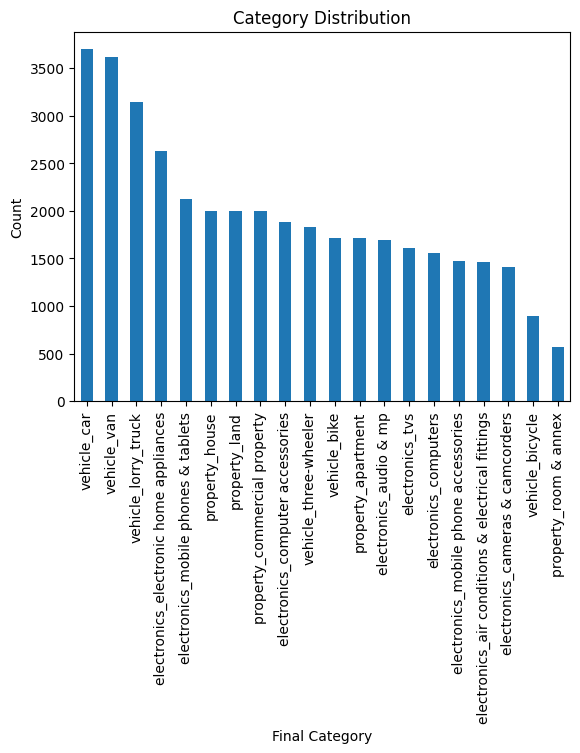

In [66]:
class_counts = data["final_category"].value_counts()

plt.figure()
class_counts.plot(kind="bar")
plt.title("Category Distribution")
plt.xlabel("Final Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


#### Divide dataset

In [67]:
# Select the input feature (X) and the target label (y).
X = data['offering_ad']
y = data['final_category']

In [68]:
# Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
X_train.shape

(31235,)

In [70]:
X_test.shape

(7809,)

In [71]:
X_train

26281                         sony tv tube eka daganna one
37724    suzuki every matale good condition interior ex...
8645     mitsubishi space gear kandy good condition wel...
19995    btu midea extream inverter පුරා වසර ගණනාවක් අක...
15854    toyota liteace used contact xxxxxxx price rs m...
                               ...                        
44489    toyota aqua kalagedihena xxxxxxxtoyota aqua se...
20296    core nd gen used full set brand new condition ...
19387    richsonic w ceiling fan aluminium blades rcf y...
19511    apple iphone display phone එකේ display ගිහින්ද...
7739     single story house sale moratuwa address rawat...
Name: offering_ad, Length: 31235, dtype: str

In [72]:
y_train

26281                                     electronics_tvs
37724                                         vehicle_van
8645                                          vehicle_van
19995    electronics_air conditions & electrical fittings
15854                                         vehicle_van
                               ...                       
44489                                         vehicle_car
20296                               electronics_computers
19387    electronics_air conditions & electrical fittings
19511                electronics_mobile phone accessories
7739                                       property_house
Name: final_category, Length: 31235, dtype: str

#### Vectorization

In [73]:
# Convert text data into numerical features using TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(     
    analyzer="char_wb",
    ngram_range=(3,5),     
    min_df=2                
)

vectorized_x_train = tfidf.fit_transform(X_train)
vectorized_x_test  = tfidf.transform(X_test)

In [74]:
import pickle

# Save TF-IDF
with open("../static/model/tfidf.pkl", "wb") as file:
    pickle.dump(tfidf, file)

In [75]:
vectorized_x_train[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 151169))

In [76]:
# Encode the target labels into numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)


In [77]:
# Save LabelEncoder
with open("../static/model/label_encoder.pkl", "wb") as file:
    pickle.dump(le, file)

In [78]:
pd.Series(y_train_enc).value_counts()

16    2954
19    2918
17    2484
5     2122
7     1680
12    1614
10    1606
11    1600
3     1497
18    1451
15    1370
1     1357
9     1345
8     1308
4     1262
0     1169
6     1167
2     1124
14     724
13     483
Name: count, dtype: int64

In [79]:
# for train
# vectorized_x_train
# y_train_enc


# Test
# vectorized_x_test
# y_test_enc

## Model Building

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [81]:
# functions to calculate and display training and testing evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average="weighted"), 3)
    rec = round(recall_score(y_act, y_pred, average="weighted"), 3)
    f1 = round(f1_score(y_act, y_pred, average="weighted"), 3)

    print(f"Training Scores:")
    print(f"\tAccuracy  = {acc}")
    print(f"\tPrecision = {pr}")
    print(f"\tRecall    = {rec}")
    print(f"\tF1-Score  = {f1}")


def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average="weighted"), 3)
    rec = round(recall_score(y_act, y_pred, average="weighted"), 3)
    f1 = round(f1_score(y_act, y_pred, average="weighted"), 3)

    print(f"Testing Scores:")
    print(f"\tAccuracy  = {acc}")
    print(f"\tPrecision = {pr}")
    print(f"\tRecall    = {rec}")
    print(f"\tF1-Score  = {f1}")


### Naive Bayes

In [82]:
# Train Multinomial Naive Bayes model and evaluate its performance on training and testing data
mnb = MultinomialNB()
mnb.fit(vectorized_x_train, y_train_enc)

y_train_pred = mnb.predict(vectorized_x_train)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_enc, y_train_pred)

validation_scores(y_test_enc, y_test_pred)

Training Scores:
	Accuracy  = 0.83
	Precision = 0.858
	Recall    = 0.83
	F1-Score  = 0.826
Testing Scores:
	Accuracy  = 0.821
	Precision = 0.849
	Recall    = 0.821
	F1-Score  = 0.818


### Support Vector Machine

In [83]:
# Train Linear SVM model and evaluate its performance on training and testing data
svm = LinearSVC()
svm.fit(vectorized_x_train, y_train_enc)

y_train_pred = svm.predict(vectorized_x_train)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_enc, y_train_pred)

validation_scores(y_test_enc, y_test_pred)

Training Scores:
	Accuracy  = 0.99
	Precision = 0.99
	Recall    = 0.99
	F1-Score  = 0.99
Testing Scores:
	Accuracy  = 0.975
	Precision = 0.975
	Recall    = 0.975
	F1-Score  = 0.974


In [84]:
import pickle

with open('../static/model/model.pkl', 'wb') as file:
    pickle.dump(svm, file)